In [1]:
import torch
import torchvision
from torch.utils.mobile_optimizer import optimize_for_mobile
from PIL import Image
import numpy as np

sys.path.insert(0, '../src')

import models
import util


torch.Size([1, 3, 321, 481])
torch.Size([1, 3, 321, 481])


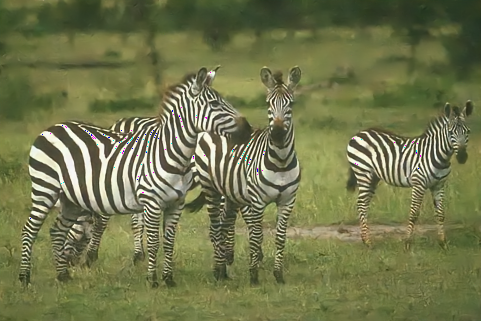

In [6]:
model_test = models.DnCNN()
model_test.load_state_dict(torch.load("../models/dncnn-r/dncnn_epoch_25000.pth")['state_dict'], strict=True)
model_test.eval()

with torch.no_grad():
    model_test.cuda()
    img = np.asarray(Image.open("noisy.png"))
    in_t = util.uint2tensor(img)
    print(in_t.unsqueeze(0).shape)
    out_t = model_test(in_t.unsqueeze(0).cuda())
print(out_t.shape)
torchvision.transforms.ToPILImage()(out_t.squeeze(0))



In [9]:
example = torch.rand(1, 3, 224, 224)
# traced_script_module = torch.jit.trace(model_test, example)
traced_script_module = torch.jit.script(model_test)

In [10]:
traced_script_module_optimized = optimize_for_mobile(traced_script_module)
traced_script_module_optimized._save_for_lite_interpreter("dncnn_r_25000_lite.ptl")

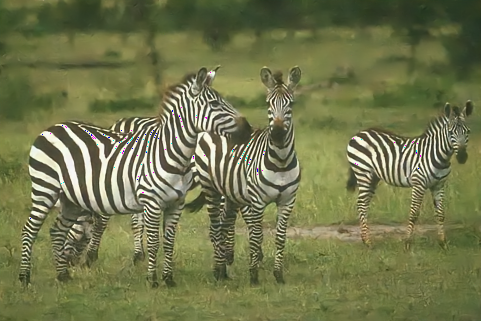

In [11]:
torchvision.transforms.ToPILImage()(traced_script_module(in_t.cuda().unsqueeze(0)).squeeze(0))

### Save noisy image to png

In [16]:
from PIL import Image
import numpy as np

img_L = np.asarray(Image.open('../data/test/253027.jpg'))
im = Image.fromarray(img_L)
im.save("clean.png")

img_L = util.uint2float(img_L)
img_L += np.random.normal(0, 25/255.0, img_L.shape)
img_L = util.float2tensor(img_L)
img_L = util.tensor2uint(img_L)

im = Image.fromarray(img_L)
im.save("noisy.png")